## **NNTI 19/20 Project 1:  PCA and Logistic Regression**

## **Deadline: 17 December 2019, 23:59**


---



**Important:** For all computations in this project, please use the torch library. The torch package contains data structures for multi-dimensional tensors and mathematical operations over these are defined. Additionally, it provides many utilities for efficient serializing of Tensors and arbitrary types, and other useful utilities.

# **1. Principal component analysis (PCA) [12 points]**

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA is also a very useful dimesnionality reduction technique. In the folowing, we explore how to apply PCA on the CIFAR dataset.

CIFAR 10 is a collection images which is commonly used to train machine learning and computer vision algorithms. This dataset contains 50000 training images and 10000 validation images such that the images can be classified between 10 different classes.  The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

**Task 1. Getting the dataset using torchvision**

Torchvision is a pytorch package which helps in loading datasets in the image domain. It has dataloaders for common datasets like CIFAR 10, MNIST etc. Complete the code below to download the CIFAR dataset using torchvision. Torchvision returns the dataset in which every image is stretched out into a 3072-dimensional row vector.

Complete the code below to load the CIFAR dataset using torchvision. Print the labels and some images with the corresponding labels.
[1.5 points]

0it [00:00, ?it/s]

170500096it [00:06, 27721587.04it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


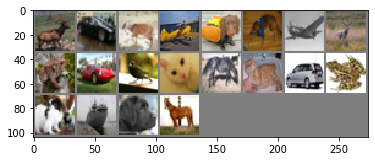

['deer', 'car', 'deer', 'plane', 'dog', 'dog', 'plane', 'deer', 'frog', 'car', 'bird', 'cat', 'horse', 'cat', 'car', 'frog', 'dog', 'ship', 'dog', 'horse']


In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# TODO: define transformation function using torchvision.transforms to convert images into pytorch tensors
trans = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# TODO: use torchvision.datasets to load CIFAR-10 train dataset and the defined transform
train_dataset = datasets.CIFAR10(root='./data', train=True,download=True, transform=trans)

# TODO: use torch.utils.data.DataLoader to get a python Iterable over the dataset, use batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True, num_workers=2)
# TODO: get the first batch of images of the dataset using python Iterator
train_iter = iter(train_loader)
images, labels = train_iter.next()

# TODO: plot the first batch of images of the training dataset
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# the labels are numbered from 0 - 9 as follows
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
imshow(make_grid(images))

print([classes[i] for i in labels])

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 2. Centering and normalization** 

PCA is applied on data after centering and normalization.
Complete the functions below to center and normalize the images. 

[1 point]

In [0]:
def center(images):
    # TODO : substract the mean from the images
    centered_images = images - torch.mean(images)
    return centered_images

def normalize(images):
    # TODO : normalize the centered images by dividing by the standard deviation
    normalized_images = images / torch.std(images)
    return normalized_images

def transform(images):
  # reshaping the images as a 3072-dimensional row vector
  images = images.reshape((images.size()[0], 3072))
  images = center(images)
  images = normalize(images)
  return images

**Points**: $0.0$ of $1$
**Comments**: None

**Task 3. Implementing PCA** 

PCA takes in the data points and the target dimension which is lesser than the original dimension of the data. In this case, the data matrix is of [number of images, 3072]. 

The following presents the main steps to perform a slightly modified version of PCA. This function takes as input the original data points, and one of the two parameters: target_dim or target_variance. If target_dim is given then return the projected data into a target_dim-dimensional space. Otherwise, the function returns data projected into a low dimensional space which captures a ratio of target_variance from the data. 


1.   Trasnform the data by centering and normalizing the images
2.   Get the data matrix of shape [#images, #dimensions] 
3.   Compute the covariance matrix of the data matrix
4.   Compute the eigenvectors and eigenvalues of the covariance matrix
5.   Sort eigenvectors by decreasing eigenvalues
6.   If target_variance is given then compute the target_dim corresponding to it.
7.   Select the top target_dim eigenvectors to get the encoding matrix of shape [target_dim, #dimesnions]
6.   Multiply the data matrix with the encoding matrix to project the data into the low dimensional space

Complete the function below to implement PCA and return the reduced dimension set and captured variance.

[8 points]

In [0]:
'''
PCA function must take the original images and either the number of target
dimensions or the ratio of the total variance to be captured from the data

'''
def PCA(images, target_dim = 0, target_variance = 0): 
  # We expect target_variance to be a value between 0 and 1, namely a fraction

  # transform the data
  data = transform(images)
  # np_data = data.numpy()
  # torch_data = torch.from_numpy(np_data)

  # TODO : compute the covariance matrix of the data points
  cov = np.cov(data.numpy(), rowvar=False)
  
  # TODO: compute the eigenvectors and eigenvalues of the covariance matrix
  # w, lamb = None
  lamb, w = np.linalg.eig(cov)

  # TODO: sort eigenvectors by decreasing eigenvalues
  idx = lamb.argsort()[::-1]   
  lamb = lamb[idx]
  w = w[:,idx]

  if(target_variance != 0):
    # TODO: compute target_dim such that target_variance is captured from the data
    i = 0
    variance_explained = 0
    for l in lamb:
      if (variance_explained >= target_variance):
        break
      variance_explained += l / sum(lamb)
      i += 1
    target_dim = i
  
  # TODO: choose $target_dim eigenvectors corresponding to the low dimensional subspace
  encoding_matrix = w[:, :target_dim]

  # TODO: multiply the data matrix with the encoding matrix to get the reduced dataset
  reduced_data = np.matmul(data.numpy(), encoding_matrix)

  # Since our input is a tensor we will also return tensors
  reduced_data = torch.from_numpy(np.real(reduced_data))
  encoding_matrix = torch.from_numpy(np.real(w[:, :target_dim]))

  return reduced_data, target_dim, encoding_matrix

**Points**: $0.0$ of $8$
**Comments**: None

**Task 4. PCA for dimensionality reduction** 

PCA is normally used to bring to acheive dimensionality reduction for high       dimensional datasets. This is acheived by bringing the dataset into a low dimensional subspace while still capturing most of the variance in the dataset. Use the above function to reduce the dataset into a 50 dimensional subspace.  

[0.5 point]

In [0]:
# TODO : use dataloader with batch size 2000 to load the dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2000, shuffle=True, num_workers=2)
# TODO : apply PCA with target_d = 50 on the first batch (contains 2000 images) from the dataloader
images, labels = next(iter(train_loader))
#transformed_images = transform(images)
reduced_data = PCA(images, target_dim=50)

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 5. PCA for visualization**

PCA is often used for visualization purposes.  Visually exploring the data can become challenging when we have more than 3 features. But this can be a very useful tool when dealing with data related problems. 

Please followe the steps below and complete the folowing code to create a scatterplot of the first and second principal components. Make use of matplotlib for the following.

1.   Create a 2D scatter plot. For each data point, plot the first principle component on $x$ axis and the second principle component on $y$ axis, use different colors for each class.
2.   Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3.   Add legends for each class.
 
Are the first two components discriminative enough to classify points from any pair of the ten classes ?
[1 point]

**Answer**: No the first two components are not discriminative enough since we are not getting distinct clusters of similar labels.

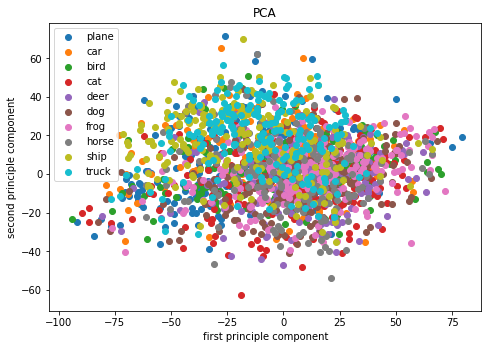

In [5]:
# create a scatterplot of the first two dimensions of the reduced data
reduced_data, _, _ = PCA(images, target_dim=2)
pca2 = reduced_data[:, 1]
pca1 = reduced_data[:, 0]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# For each class we maintain a list of points
pca_for_label = {}
for label in classes:
  pca_for_label[label] = []

for i, label_index in enumerate(labels):
    #Iterate over the batch and obtain label, x and y coordinates of one sample
    label = classes[label_index]
    x = pca1[i].data.numpy()
    y = pca2[i].data.numpy()
    # Save the data point in the list of the corresponding label
    pca_for_label[label].append((x, y))

# Note this should only performs 10 iterations (one for each class)
for label in classes:
    # Put all x's in one list and all y's in another
    x_list, y_list = zip(*pca_for_label[label])
    ax.scatter(list(x_list), list(y_list), label=label)

ax.set_xlabel('first principle component')
ax.set_ylabel('second principle component')
ax.set_title('PCA')
ax.legend()
plt.show()

**Points**: $0.0$ of $1$
**Comments**: None


---



# **2. Logistic regression [18 points]**


Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In this section, we explore the binary logistic regression. We change the clsssification problem with 10 classes into a binary classification problem by considering only the points from the classes *'ship'* and *'car'*.

![Logistic regression image](https://drive.google.com/uc?id=1eRF1-2qnQYAkkCDpAwROj5MiMKzct2x0)


**Task 6. Generating training dataset** 

Since logistic regression is a classification problem with two classes, we need a labelled dataset with two classes as the training set. Complete the function to obtain the datapoints corresponding to labels *'ship'* and *'car'*. 

Please follow the steps below: 

1. Load the train and test sets of CIFAR 10 from torchvision using a batch size of 1024.
2. Split the training samples by 80:20 ratio into train set and validation set respectively. 
3. Filter the datasets to only have images with classes 'ship' or 'car'. The corresponding labels are 8 and 1 respectively.
4. The new labels for binary classification problem should be 'ship' : 0 and 'car': 1.
5. Define a [torch.utils.data.Dataset](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html) with the filtered tensors of images and the newly created labels.
6. Define a dataloader for training and validation datasets with batch_size 64.

[1.5 point]


In [6]:
# TODO : generate the train, validation, and test sets from CIFAR 10
trans = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=trans)
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=trans)

lengths = [int(len(train_dataset)*0.8), int(len(train_dataset)*0.2)]
training_set, validation_set = torch.utils.data.random_split(train_dataset, lengths)

def filter_by_label(dataset, labels):
  filtered_dataset = []
  for image, label in dataset:
    if label in labels:
      filtered_dataset.append((image, labels[label]))
  return filtered_dataset

new_labels = {8:0, 1:1}
filtered_training_set = filter_by_label(training_set, new_labels)
filtered_validation_set = filter_by_label(validation_set, new_labels)
filtered_test_set = filter_by_label(test_dataset, new_labels)

# Because applying PCA on batches could yield different dimension defining
# dataloader at this point doesn't make much sense...
training_data = torch.utils.data.DataLoader(filtered_training_set, batch_size=64, shuffle=True, num_workers=2)
validation_data = torch.utils.data.DataLoader(filtered_validation_set, batch_size=64, shuffle=True, num_workers=2)
test_data = torch.utils.data.DataLoader(filtered_test_set, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


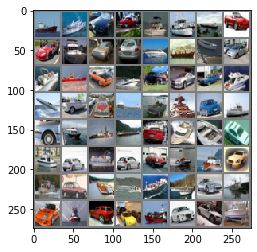

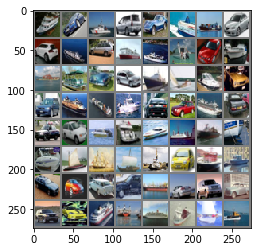

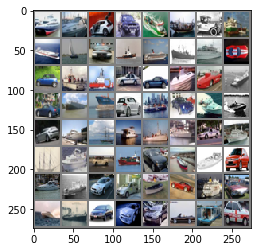

In [7]:
#This is only for testing, we can remove this when it isn't needed any longer
first_batch_training = next(iter(training_data))
imshow(make_grid(first_batch_training[0]))

first_batch_validation = next(iter(validation_data))
imshow(make_grid(first_batch_validation[0]))

first_batch_test = next(iter(test_data))
imshow(make_grid(first_batch_test[0]))

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 7. Get the dataset in the low dimensional subspace** 

Apply pca on the original data points to get new data matrix.
The target dimensions must capture 90% of the variance in the data.
Use the previously defined PCA function for this task. In the coming sections, we will be using this projected training dataset to training the logistic regression model.

[0.5 point]


In [8]:
# TODO : use the pca function defined in task 3 to reduce dimensions of the train set 

# This function applies PCA on a dataset as opposed to applying in to a single batch
def create_single_batch(dataset):
  images = []
  for image, label in dataset:
    images.append(image)
  return torch.stack(images)

filtered_training_set_single_batch = create_single_batch(filtered_training_set)
reduced_data, num_comps, encm =  PCA(filtered_training_set_single_batch, target_variance=0.9)
print(reduced_data.shape, num_comps, encm.shape)

torch.Size([7980, 98]) 98 torch.Size([3072, 98])


**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 8. Logistic regression hypothesis** 

In order to map predicted values to probabilities, logistic regression needs a function which returns values between 0 and 1. Logistic function is used in this case. This function maps any real value into another value between 0 and 1. In machine learning, it is also referred to as sigmoid and is used to map predictions to probabilities.

$f(x) = \frac{1}{1 + e^{-x}}$

![Image of logistic regression function](https://en.wikipedia.org/wiki/Logistic_function#/media/File:Logistic-curve.svg)

Complete the following function which returns the sigmoid of a given input. 

[0.5 point]


In [0]:
def sigmoid(x):  
  # TODO find and return the sigmoid of x
  # @s8abbash I just heard from a student of mine that using self defined
  # sigmoid function causes numerical instability. So maybe, you can look
  # into that.
  # Source: forum
  return torch.sigmoid(x)

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 9. Loss function** 

A common loss function used when dealing with probabilities in binary classification is binary cross entropy loss.

$cross\_entropy\_loss(y, \hat y) = \frac{1}{N} \sum_{i=0}^{N} y\log \hat y_{i} + (1-y)\log (1 - \hat y_{i})$

For binary cross entropy loss, the number of classes is 2.

Read about cross entropy in this [link](https://en.wikipedia.org/wiki/Cross_entropy).

Complete the following function to return the binary cross entropy loss. 

[1 point]

In [0]:
def bce(y_true, y_pred):
  # TODO : compute mean binary cross entropy loss given a list of predicted and true labels
  # @s8abbash I just heard from a student of mine that using self defined
  # sigmoid function causes numerical instability. So maybe, you can look
  # into that.
  # We believe thats the case for the loss as well...
  # Source: forum
  loss = torch.nn.BCELoss()
  bce_loss = loss(y_pred, y_true)
  # bce_loss.backward()
  return bce_loss

**Points**: $0.0$ of $1$
**Comments**: None

**Task 10. Gradient descent to minimize the loss** 

The logistic regression parameter need to be optimized to minimize the loss function.

We have the output of the logistic regression given a vector **x** as follows.

$f(x) = \frac{1}{1 + e^{-wx}}$

Complete the following function to calculate the gradient of binary cross entropy loss function with respect to the parameter w. 

[1 point]

In [0]:
def gradient(loss):
  # TODO : compute and return the gradient of loss w.r.t the weight parameter
  loss.backward()

**Points**: $0.0$ of $1$
**Comments**: None

**Task 11 . Fitting the model** [5 point]

Complete the function below which fits a logistic regression model on the given input data with the specified learning rate and number of epochs using stochastic gradient descent.

Follow the steps below to complete the function.
```
For each epoch:
  For each mini batch:
    1. Compute the predicted probabilities for all samples in the batch (y_pred)
    2. Compute the predicted probabilities for all samples in the batch (y_pred).
    3. Compute mean loss of the batch using function defined in task 9.
    4. Compute the gradient of the loss w.r.t the weight parameter. use functin defined in task 10.
    5. Keep track of the mean loss during each epoch.
    6. Update weight parameter using stochastic gradient descent. The batch size is 64, according to the dataloaders defined in task 6. 
Return the loss and the optimized weight parameter.
```


In [0]:
def create_PCA_dataset(raw_dataset, target_dim = 0, target_variance = 0):
  images, labels = zip(*raw_dataset)
  images_as_batch = torch.stack(images)
  pca_images, num_comps, encm = PCA(images_as_batch, target_dim, target_variance)
  reduced_images = [image for image in pca_images]
  pca_dataset = list(zip(reduced_images, labels))
  return pca_dataset, num_comps


pca_train_dataset, pca_train_dim = create_PCA_dataset(filtered_training_set, target_variance=0.9)
pca_train_dataloader = torch.utils.data.DataLoader(pca_train_dataset, batch_size=64, shuffle=True, num_workers=2)

In [0]:
def fit(data, epochs, learning_rate):
  # TODO: get the data points and corresponding labels
  x, y = zip(*data)
  num_of_batches = len(x)

  '''TODO: The input x, which is multidimensional in this case, is multiplied
     with the logistic regression parameter W to get a scalar. This is then 
     passed to the sigmoid function to get the probability. Use a tensor of 
     the required shape to initialize the weight parameter
  '''

  weight = torch.ones(list(next(iter(x)).shape)[1], dtype=torch.float64)
  weight.requires_grad = True

  # looping over the data   
  for epoch in range(epochs):  
    net_loss = 0.0 
    # for each mini batch
    for batch_x, batch_y in data: 
      # TODO: get the predicted probabilites for the batch
      y_pred = sigmoid(batch_x @ weight)

      # TODO: compute the mean loss of the batch
      loss = bce(batch_y.double() ,y_pred)
      net_loss += loss.item()

      # TODO: compute the gradient of the loss w.r.t weight
      gradient(loss)

      # TODO : perform one step of stochastic gradient descent to update weight
      weight = weight.data - learning_rate * weight.grad
      weight.requires_grad = True

    print('epoch: %d net_loss: %6.3f'%(epoch, net_loss/num_of_batches))
  return weight, net_loss/num_of_batches

In [0]:

fit(pca_train_dataloader, 1000, 0.001)

**Points**: $0.0$ of $5$
**Comments**: None

**Task 12. Hyperparameter tuning** 

The learning rate and the number of epochs are important hyperparameters that need to be set before training. 
Complete the function below to select the best hyperparameters given the list of possible combinations.

[1.5 point]

In [0]:
def select_best_hyperparams(data, learning_rates, epochs):
  # TODO : initialize best loss
  best_loss = -1
  best_learning_rate = learning_rates[0]
  best_epoch = epochs[0]

  for learning_rate, epoch in zip(learning_rates, epochs):
    _, loss = fit(data, epochs=epoch, learning_rate=learning_rate)
    if (best_loss == -1):
      best_loss = loss
      best_learning_rate = learning_rate
      best_epoch = epoch
    if (best_loss > loss):
      best_loss = loss
      best_learning_rate = learning_rate
      best_epoch = epoch
    # TODO find the hyperparameter combination which returns the minimum loss after training (using fit function)    
    best_hyperparams = (best_learning_rate, best_epoch)
    
  return best_hyperparams, best_loss

**Points**: $0.0$ of $1.5$
**Comments**: None

**Task 13. Training using the best hyperparameters** [0.5 point]

Complete the code below to select the best hyperparamater combination and then fit the training data using the selected learning rate and number of epochs.



In [0]:
# hyperparameters combinations  
learning_rates = [0.01, 0.1, 1] 
epochs = [25, 50, 100]

# TODO : use the function defined in task 12 to find the best hyperparameter combination from the above list
pca_validation_dataset, _ = create_PCA_dataset(filtered_validation_set, target_dim=pca_train_dim)
pca_validation_dataloader = torch.utils.data.DataLoader(pca_validation_dataset, batch_size=64, shuffle=True, num_workers=2)

best_hyperparams, best_loss = select_best_hyperparams(pca_validation_dataloader, learning_rates, epochs)
print('Best hyperparameters using validation data.\nLearning rate: %5.3f, Number of epochs: %d '% (best_hyperparams[0], best_hyperparams[1]))

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 14. Logistic regression threshold** 

Logistic regression takes an input and returns a values between 0 and 1. To interpret this output as a probability of the input being in a class, we need to define a threshold. We set a threshold of 0.5.

We predict class 0 if f(x) is greater than or equal to 0.5, else we predict the data point to be of an instance of class 1.

Complete the following function which predicts the class (ship or car) of a given input. [1 point]

In [0]:
threshold = 0.5

def predict(x):
  # TODO : compute the predicted class label
  w, _ = fit(pca_train_dataloader, best_hyperparams[0], best_hyperparams[1])
  ret = 0 if 1 - sigmoid(x @ w) >= threshold else 1
  return ret

In [0]:
image, label = next(iter(pca_validation_dataloader))
print(predict(image))
print(label)


**Points**: $0.0$ of $1$
**Comments**: None

**Task 15. Reporting accuracy on test set** [*0.5* point]

The test set is used to give an indication of the generalization abilities of the model, that is to estimate how good the model is over random guessing at an unseen data point.

Complete the code below to compute the accuracy of logistic regression model on the test set. For this, first bring the test set to the low dimensional subspace and then make predictions using the trained model. 


In [0]:
# TODO : bring the test set into the low dimesnional subspace defined earlier for the train set
reduced_test_set = None

# TODO: compute the accuracy on the reduced test set
acc = 0.0

print('Accuracy on the test set : %6.3f'% (acc))

**Points**: $0.0$ of $0.5$
**Comments**: None

**Task 16. Improving accuracy on test set** [*5* point]

Use pytorch's neural network layer functions and construct a model which gives better accuracies for the same training and test set. You can have a look at the torch.nn package for this. 

Describe the model and explain why it performs better ?

In [0]:
def my_model():
  # TODO

**Points**: $0.0$ of $5$
**Comments**: None